In [ ]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)
from keras.datasets import mnist

Using TensorFlow backend.


In [ ]:
(xtrain,ytrain),\
(xtest,ytest)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [ ]:
print(len(xtrain))

60000


In [ ]:
print(len(xtest))

10000


In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig=plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image,cmap='binary')
    plt.show()

In [ ]:
def plot_image_label_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title='label='+str(labels[idx])
        if len(prediction)>0:
            title+=',predict='+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx+=1
    plt.show()    

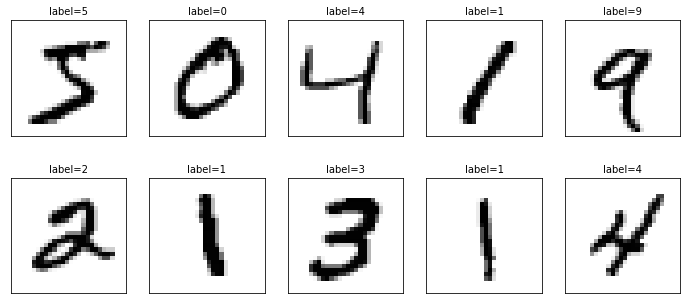

In [ ]:
plot_image_label_prediction(xtrain,ytrain,[],0,10)

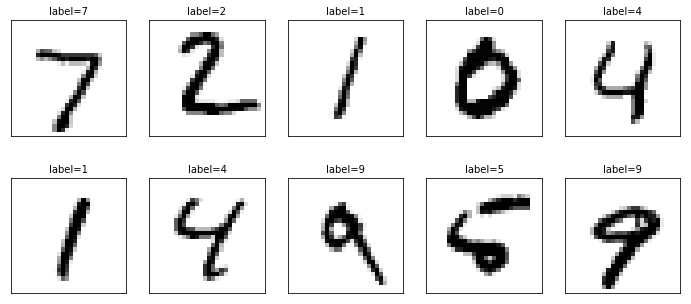

In [ ]:
plot_image_label_prediction(xtest,ytest,[],0,10)

In [ ]:
x_train=xtrain.reshape(60000,784).astype('float32')

In [ ]:
x_test=xtest.reshape(10000,784).astype('float32')

In [ ]:
x_train[0]

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,

In [ ]:
x_train_normal=x_train/255
x_test_normal=x_test/255

In [ ]:
y_train=np_utils.to_categorical(ytrain)
y_test=np_utils.to_categorical(ytest)

In [ ]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [ ]:
model=Sequential()

In [ ]:
# input dimension = 784
input_dim = x_train.shape[1]
encoding_dim = 32

compression_factor = float(input_dim) / encoding_dim
print("Compression factor: %s" % compression_factor)

autoencoder = Sequential()
autoencoder.add(
    Dense(encoding_dim, input_shape=(input_dim,), activation='relu')
)
autoencoder.add(
    Dense(input_dim, activation='sigmoid')
)

autoencoder.summary()

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
training=model.fit(x=x_train_normal,
                  y=y_train,validation_split=0.2,
                  epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.3843 - acc: 0.8937 - val_loss: 0.1691 - val_acc: 0.9513
Epoch 2/10
 - 2s - loss: 0.1425 - acc: 0.9575 - val_loss: 0.1203 - val_acc: 0.9638
Epoch 3/10
 - 2s - loss: 0.0950 - acc: 0.9719 - val_loss: 0.1015 - val_acc: 0.9694
Epoch 4/10
 - 2s - loss: 0.0689 - acc: 0.9790 - val_loss: 0.1009 - val_acc: 0.9698
Epoch 5/10
 - 2s - loss: 0.0508 - acc: 0.9841 - val_loss: 0.0889 - val_acc: 0.9719
Epoch 6/10
 - 3s - loss: 0.0376 - acc: 0.9886 - val_loss: 0.0797 - val_acc: 0.9766
Epoch 7/10
 - 2s - loss: 0.0282 - acc: 0.9913 - val_loss: 0.0800 - val_acc: 0.9767
Epoch 8/10
 - 2s - loss: 0.0207 - acc: 0.9937 - val_loss: 0.0767 - val_acc: 0.9793
Epoch 9/10
 - 2s - loss: 0.0158 - acc: 0.9952 - val_loss: 0.0828 - val_acc: 0.9782
Epoch 10/10
 - 2s - loss: 0.0120 - acc: 0.9965 - val_loss: 0.0830 - val_acc: 0.9778


In [ ]:
def show_training(training,train,validation):
    plt.plot(training.history[train])
    plt.plot(training.history[validation])
    plt.title('training process')
    plt.ylabel('training measure')
    plt.xlabel('Epoch')
    plt.legend(['training','validation'],loc='upper left')
    plt.show()

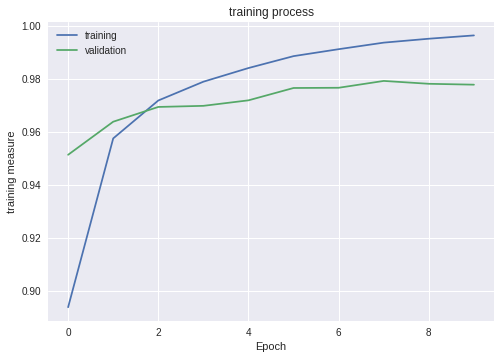

In [ ]:
show_training(training,'acc','val_acc')

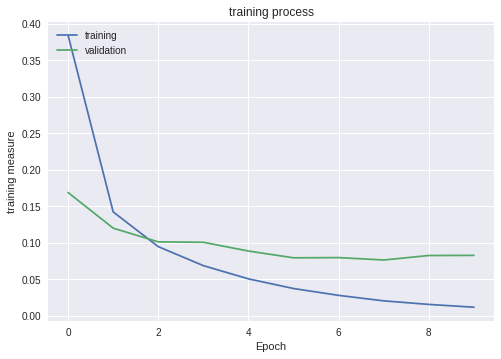

In [ ]:
show_training(training,'loss','val_loss')

In [ ]:
scores=model.evaluate(x_test_normal,y_test)

10000/10000 [==============================] - 0s 35us/step


In [ ]:
scores[1]

0.9783

In [ ]:
scores

[0.075896652767527842, 0.9758]

In [ ]:
prediction=model.predict_classes(x_test_normal)

In [ ]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

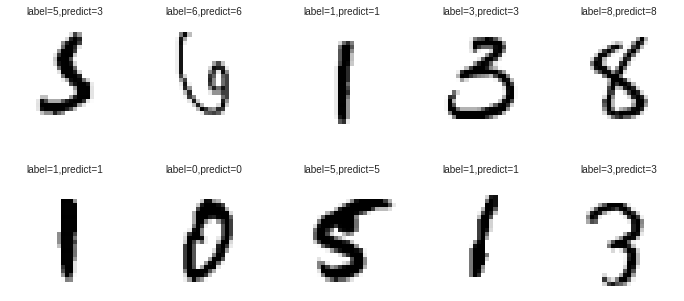

In [ ]:
plot_image_label_prediction(xtest,ytest,prediction,340,10)

In [ ]:
pd.crosstab(ytest,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,973,0,0,3,1,0,1,0,1,1
1,0,1126,3,1,0,0,2,0,3,0
2,7,1,1000,6,2,0,3,3,10,0
3,0,0,1,991,0,3,0,3,4,8
4,0,0,4,0,968,0,3,1,2,4
5,3,0,0,8,2,867,4,0,4,4
6,4,3,0,1,4,4,940,0,2,0
7,3,4,11,5,1,0,0,995,4,5
8,4,0,3,9,2,1,2,2,946,5
